# Make new compositional diagrams

In [1]:
import flashalgorithm as fc
import numpy as np
import dill as pickle
import itertools as itool
import pdb
import matplotlib.pyplot as plt
import time

In [2]:
def get_stable_phases(x):
    index_get = list()
    color = 'black'
    if np.sum((x[4][0][:, 1] - x[4][0][:, 2])**2) < 1e-8:
        if (x[4][1][1] > x[4][1][2]) and (x[4][1][1] > 1e-10):
            index_get.append(2)
        elif (x[4][1][2] > 1e-10):
            index_get.append(2)
    else:
        if x[4][1][1] > 1e-10:
            index_get.append(1)
        if x[4][1][2] > 1e-10:
            index_get.append(2)
    for ii in [0, 3, 4]:
        if x[4][1][ii] > 1e-10:
            index_get.append(ii)
    if len(index_get) == 2:
        if sorted(index_get) == [0,1]:
            color = 'blue'
        elif sorted(index_get) == [0,2]:
            color = 'green'
        elif sorted(index_get) == [0,3]:
            color = 'pink'
        elif sorted(index_get) == [0,4]:
            color = 'orange'
        elif sorted(index_get) == [1,3]:
            color = 'teal'
        elif sorted(index_get) == [1,4]:
            color = 'gray'
        elif sorted(index_get) == [2,3]:
            color = 'olive'
        elif sorted(index_get) == [3,4]:
            color = 'brown'
        elif sorted(index_get) == [2,4]:
            color = 'purple'
        else:
            color = 'burgundy'
    return index_get, color
def sr2xy(c1, c2=None):
    if type(c1) == np.ndarray:
        x = c1[:, 0] + 0.5 * c1[:, 1]
        y = c1[:, 1] * (np.sqrt(3.0) / 2.0)
        return np.transpose(np.vstack([x, y]))
    else:
        x = c1 + 0.5 * c2
        y = c2 * (np.sqrt(3.0) / 2.0)
        return x, y
def xy2sr(x, y=None):
    if type(x) == np.ndarray:
        c2 = x[:, 1] * (2.0 / np.sqrt(3.0))
        c1 = x[:, 0] - 0.5 * c2
        c3 = 1 - c2 - c3
        return np.transpose(np.vstack([c1, c2, c3]))
    else:
        c2 = y * (2.0 / np.sqrt(3.0))
        c1 = x - 0.5 * c2
        c3 = 1 - c2 - c1
        return c1, c2, c3
def ctoxyz(c1, c2=None, c3=None):
    if type(c1) == np.ndarray:
        x = 0.5 * (c1[:, 0] + c1[:, 2]) + c1[:, 1]
        y = c1[:, 0] * (np.sqrt(3.0) / 2.0) + c1[:, 2] * (1 / (2.0 * np.sqrt(3.0)))
        z = c1[:, 0] * np.sqrt(2.0 / 3.0)
        return np.transpose(np.vstack([x, y, z]))
    else:
        x = 0.5 * (c1 + c3) + c2
        y = c1 * (np.sqrt(3.0) / 2.0) + c3 * (1 / (2.0 * np.sqrt(3.0)))
        z = c3 * np.sqrt(2.0 / 3.0)
        return x, y, z
def xyztoc(x, y=None, z=None):
    if type(x) == np.ndarray:
        c3 = x[:, 2] * np.sqrt(3.0 / 2.0)
        c1 = (x[:, 1] - c3 * (1 / (2.0 * np.sqrt(3.0)))) * (2.0 / np.sqrt(3.0))
        c2 = x[:, 0] - 0.5 * (c1 + c3)
        c4 = 1 - c1 - c2 - c3
        return np.transpose(np.vstack([c1, c2, c3, c4]))
    else:
        c3 = z * np.sqrt(3.0 / 2.0)
        c1 = (y - c3 * (1 / (2.0 * np.sqrt(3.0)))) * (2.0 / np.sqrt(3.0))
        c2 = x - 0.5 * (c1 + c3)
        c4 = 1 - c1 - c2 - c3
        return c1, c2, c3, c4

color_dict = {0: 'blue',
              1: 'red',
              2: 'purple',
              3: 'black',
              4: 'orange'}

In [108]:
# data = pickle.load(open('c1toc3_flashtable_91bar282K.pkl', 'rb'))
# data += pickle.load(open('91.0bar282T_addedcomps_1pt.pkl', 'rb'))
# data = pickle.load(open('c1toc3_flashtable_165bar289K.pkl', 'rb'))
data = pickle.load(open('c1toc3_flashtable_110bar19C.pkl', 'rb'))

In [109]:
data

[[0,
  array([ 0.92      ,  0.06177215,  0.01822785,  0.        ]),
  ('water', 'methane', 'ethane'),
  array([ 0.92      ,  0.06177215,  0.01822785]),
  [array([[  9.98028693e-01,   3.16060092e-04,   3.16060092e-04,
             8.57133306e-01,   8.60127861e-01],
          [  1.66042774e-03,   7.70278027e-01,   7.70278027e-01,
             8.10245750e-02,   9.65303057e-02],
          [  3.10879403e-04,   2.29405913e-01,   2.29405913e-01,
             6.18421192e-02,   4.33418334e-02]]),
   array([  9.21792418e-01,   1.00000000e-10,   7.82075823e-02,
            0.00000000e+00,   0.00000000e+00]),
   array([[  1.00000000e+00,   3.16684374e-04,   3.16684374e-04,
             8.52253850e-01,   8.54779828e-01],
          [  1.00000000e+00,   4.63903370e+02,   4.63903370e+02,
             4.87974111e+01,   5.81358064e+01],
          [  1.00000000e+00,   7.37925737e+02,   7.37925738e+02,
             1.98926396e+02,   1.39416870e+02]]),
   8,
   1.9619821105717916e-08]],
 [1,
  array([ 0.6 

In [110]:
def make_ref_list(data):
    phase_stable_lookup = dict()
    type_ref_list = list()
    phase_type = 0
    for ii, x in enumerate(data):
        index_get, color = get_stable_phases(x)
        if sorted(index_get) in type_ref_list:
            phase_stable_lookup[type_ref_list.index(sorted(index_get))]['inds'].append(ii)
        else:
            phase_stable_lookup[phase_type] = {'phases': sorted(index_get), 'inds': [ii], 'color': color}
            phase_type += 1
            type_ref_list.append(sorted(index_get))
    return type_ref_list, phase_stable_lookup
type_ref_list, phase_stable_lookup = make_ref_list(data)

In [111]:
def plot_tern_lines(x, tern_inds=[0,1,2]):
    z = x[4][0]
    absent_ind = [ind for ind in range(4) if ind not in tern_inds].pop()
    if (np.sum(x[1][tern_inds]) == 1) or (x[1][absent_ind] == 0.0):
        index_get, color = get_stable_phases(x)
        if x[-1][-1] < 5e-5:
            if (len(index_get) == 2) and (color != 'black'):
                if (len(z) == 3) or (x[1][tern_inds[2]] == 0.0):
                    x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                    x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
                else:
                    x1, y1 = sr2xy(0, z[0, index_get[0]])
                    x2, y2 = sr2xy(0, z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
            elif len(index_get) == 3:
#                 if z[0, index_get[0]] > 0.86:
#                      import pdb
#                      pdb.set_trace()
                x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                x3, y3 = sr2xy(z[1, index_get[2]], z[0, index_get[2]])
                plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], '-r')
                
def plot_3d_tietri(index_interest, color, tie=False):
    x_line = dict([('1', []), ('2', []), ('3', [])])
    y_line = dict([('1', []), ('2', []), ('3', [])])
    z_line = dict([('1', []), ('2', []), ('3', [])])
    triangles = list()
    if sorted(index_interest) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset:
            if (x[-1][-1] < 1e-5):
                z = x[4][0]
                if (len(z) == 4) or (x[1][3] == 0):
                    x1, y1, z1 = ctoxyz(z[2, index_interest[0]], z[1, index_interest[0]], z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(z[2, index_interest[1]], z[1, index_interest[1]], z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(z[2, index_interest[2]], z[1, index_interest[2]], z[0, index_interest[2]])
                elif x[1][2] == 0.0:
                    x1, y1, z1 = ctoxyz(0, z[1, index_interest[0]], z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(0, z[1, index_interest[1]], z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(0, z[1, index_interest[2]], z[0, index_interest[2]])
                elif x[1][1] == 0.0:
                    x1, y1, z1 = ctoxyz(z[1, index_interest[0]], 0, z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(z[1, index_interest[1]], 0, z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(z[1, index_interest[2]], 0, z[0, index_interest[2]])
                triangles.append([[x1, x2, x3, x1], [y1, y2, y3, y1], [z1, z2, z3, z1]])
                z_line['1'].append(z1)
                z_line['2'].append(z2)
                z_line['3'].append(z3)

                y_line['1'].append(y1)
                y_line['2'].append(y2)
                y_line['3'].append(y3)

                x_line['1'].append(x1)
                x_line['2'].append(x2)
                x_line['3'].append(x3)

        if (x_line['1'] != []):
            if tie:
                for tietri in triangles:
                    ax.plot(tietri[0], tietri[1], tietri[2], '-', color=color)
            ax.plot(x_line['1'], y_line['1'], z_line['1'], '.', color=color_dict[index_interest[0]])
            ax.plot(x_line['2'], y_line['2'], z_line['2'], '.', color=color_dict[index_interest[1]])
            ax.plot(x_line['3'], y_line['3'], z_line['3'], '.', color=color_dict[index_interest[2]])
            
def plot_3d_4phase(index_interest):
    if sorted(index_interest) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset[0:1]:
            if (x[4][3] != 1000) and (x[-1][-1] < 1e-5):
                z = x[4][0]
                x1, y1, z1 = ctoxyz(z[2, index_interest[0]], z[1, index_interest[0]], z[0, index_interest[0]])
                x2, y2, z2 = ctoxyz(z[2, index_interest[1]], z[1, index_interest[1]], z[0, index_interest[1]])
                x3, y3, z3 = ctoxyz(z[2, index_interest[2]], z[1, index_interest[2]], z[0, index_interest[2]])
                x4, y4, z4 = ctoxyz(z[2, index_interest[3]], z[1, index_interest[3]], z[0, index_interest[3]])
                ax.plot([x1, x2], [y1, y2], [z1, z2], '-', color='pink')
                ax.plot([x2, x3], [y2, y3], [z2, z3], '-', color='pink')
                ax.plot([x3, x1], [y3, y1], [z3, z1], '-', color='pink')
                ax.plot([x4, x1], [y4, y1], [z4, z1], '-', color='pink')
                ax.plot([x4, x2], [y4, y2], [z4, z2], '-', color='pink')
                ax.plot([x4, x3], [y4, y3], [z4, z3], '-', color='pink')
def plot_pseudo_4phase(index_mod):
    if sorted(index_mod) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_mod))]['inds']]
        for x in data_subset[0:1]:
            if (x[4][3] != 10-0) and (x[-1][-1] < 1e-5):
                z = x[4][0]
                z_p = z[1:, :] / np.sum(z[1:, :], 0)[np.newaxis, :]
                x1, y1 = sr2xy(z_p[0, index_mod[0]], z_p[2, index_mod[0]])
                x2, y2 = sr2xy(z_p[0, index_mod[1]], z_p[2, index_mod[1]])
                x3, y3 = sr2xy(z_p[0, index_mod[2]], z_p[2, index_mod[2]])
                x4, y4 = sr2xy(z_p[0, index_mod[3]], z_p[2, index_mod[3]])
                plt.plot([x1, x2], [y1, y2], '--', color='pink')
                plt.plot([x2, x3], [y2, y3], '--', color='pink')
                plt.plot([x3, x1], [y3, y1], '--', color='pink')
                plt.plot([x4, x1], [y4, y1], '--', color='pink')
                plt.plot([x4, x2], [y4, y2], '--', color='pink')
                plt.plot([x4, x3], [y4, y3], '--', color='pink')
def plot_pseudo_tern(index_interest):
    if sorted(index_interest) in type_ref_list:
        x_line = dict([('0', []), ('1', []), ('2', [])])
        y_line = dict([('0', []), ('1', []), ('2', [])])
    #     triangles = list()
#         index_mod = [ind for ind in index_interest if ind !=0]
        index_mod = [ind for ind in index_interest]

        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset:
            if (x[4][3] != 1000) and (x[-1][-1] < 5e-5):
                z = x[4][0]
                z_p = z[1:, :] / np.sum(z[1:, :], 0)[np.newaxis, :]
                if (len(z_p) == 3):
                        x0, y0 = sr2xy(z_p[0, index_mod[0]], z_p[2, index_mod[0]])
                        x1, y1 = sr2xy(z_p[0, index_mod[1]], z_p[2, index_mod[1]])
                        if len(index_mod) == 3:
                            x2, y2 = sr2xy(z_p[0, index_mod[2]], z_p[2, index_mod[2]])
                else:
                    if x[1][2] == 0.0:
                            x0, y0 = sr2xy(z_p[0, index_mod[0]], z_p[1, index_mod[0]])
                            x1, y1 = sr2xy(z_p[0, index_mod[1]], z_p[1, index_mod[1]])
                            if len(index_mod) == 3:
                                x2, y2 = sr2xy(z_p[0, index_mod[2]], z_p[1, index_mod[2]])
                    elif x[1][1] == 0.0:
                            x0, y0 = sr2xy(0, z_p[1, index_mod[0]])
                            x1, y1 = sr2xy(0, z_p[1, index_mod[1]])
                            if len(index_mod) == 3:
                                x2, y2 = sr2xy(0, z_p[1, index_mod[2]])
                    elif x[1][3] == 0.0:
                            x0, y0 = sr2xy(z_p[0, index_mod[0]], 0)
                            x1, y1 = sr2xy(z_p[0, index_mod[1]], 0)
                            if len(index_mod) == 3:
                                x2, y2 = sr2xy(z_p[0, index_mod[2]], 0) 
                y_line['0'].append(y0)
                y_line['1'].append(y1)
                if len(index_mod) == 3:
                    y_line['2'].append(y2)
                x_line['0'].append(x0)
                x_line['1'].append(x1)
                if len(index_mod) == 3:
                    x_line['2'].append(x2)
        if (x_line['1'] != []):
            plt.plot(x_line['0'], y_line['0'], '.', color=color_dict[index_mod[0]])
            plt.plot(x_line['1'], y_line['1'], '.', color=color_dict[index_mod[1]])
            if len(index_mod) == 3:
                plt.plot(x_line['2'], y_line['2'], '.', color=color_dict[index_mod[2]])

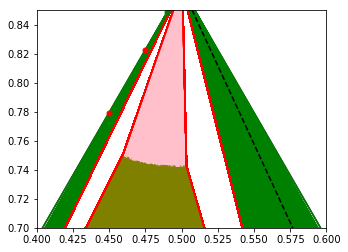

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')
c1c2_inds = [0, 1, 2]
c1c3_inds = [0, 1, 3]
c2c3_inds = [0, 2, 3]
tern_inds = c1c2_inds
for x in data:
    plot_tern_lines(x, tern_inds=tern_inds)
x_mix1, y_mix1 = sr2xy(0.9, 0)
x_mix2, y_mix2 = sr2xy(0, 1)
plt.plot([x_mix1, x_mix2], [y_mix1, y_mix2], 'k--')
x, y = sr2xy(0, 0.999)
plt.plot(x, y, 'b.', markersize=10)
x, y = sr2xy(0, 0.998)
plt.plot(x, y, 'b.', markersize=10)
x, y = sr2xy(0, 0.997)
plt.plot(x, y, 'b.', markersize=10)
plt.plot(x, y, 'b.', markersize=10)
x, y = sr2xy(0, 0.98)
plt.plot(x, y, 'g.', markersize=10)
x, y = sr2xy(0, 0.95)
plt.plot(x, y, 'r.', markersize=10)
x, y = sr2xy(0, 0.9)
plt.plot(x, y, 'r.', markersize=10)


plt.axis('scaled')
# plt.text(-0.06, 0, 'C' + str(tern_inds[2]))
# plt.text(1.0, 0, 'C' + str(tern_inds[1]))



plt.ylim([0.7, 0.85])
plt.xlim([0.4, 0.6])

# plt.ylim([0.864, 0.8665])
# plt.xlim([0.498, 0.502])

# plt.ylim([0.858, 0.8665])
# plt.xlim([0.494, 0.506])

plt.savefig('test_paganoni.svg')
plt.show()